## Drop One Variable (DOV) analysis

Here we drop a single variable at a time from the data set and compute the Sovi score with n-1 variables.  This gives us 28 different sovi scores, each one representing an index that is slightly different from the one constructed in the previous sectiob index.  We say "slightly" different, because each of the 28 different sovi indices is missing a single variable.  However, removing only one of the 28 variables shouldn't have a dramatic impact on the index, especailly if the variable wasn't very important to begin with.  

The code below does some fancy indexing in Pandas.  Its an elegant way to store 28 national sovi indices in a single data frame.  

In [245]:
import os
import pandas as pd
import pysal as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import zscore as ZSCORE
from scipy.stats import rankdata
from scipy.stats import spearmanr 

# sovi compute script
import sys
sys.path.append(os.path.join(os.getcwd(),'code'))
from spss_pca import SPSS_PCA
import compute_sovis

In [246]:
#Get attribute names
attr_names=[j[0] for j in compute_sovis.input_names]

In [247]:
# rather than populating the `netContrib` object
# we can just use the final var contributions from 
# `compute_sovis`...
netContrib=compute_sovis.variable_contributions

#reorder table        
cols = ['USA', 'FEMA_1', 'g23g33g25', 
'FEMA_2', 'g36','FEMA_3', 'g51', 'FEMA_4', 'g13', 'FEMA_5', 'g17',
'FEMA_6', 'g48', 'FEMA_7', 'g29', 'FEMA_8', 'g46', 'FEMA_9', 'g06', 'FEMA_10', 
'g16']
netContrib = netContrib[cols]

#variable rank using absolute value      
rankContrib = abs(netContrib).apply(rankdata, axis=0, method='average')
rankContrib = (28-rankContrib) + 1

combContrib = pd.DataFrame(columns=list(netContrib.columns), index=list(netContrib.index))
#can't think of a more elegant way to do this
for aRow in range(netContrib.shape[1]):
    for aCol in range(netContrib.shape[0]):
        combContrib.ix[aCol][aRow] = str(round(netContrib.ix[aCol][aRow], 2)) + ' (' + str(int(rankContrib.ix[aCol][aRow])) + ')'

#build list of varIDs and human readable names
#sort and use as index for conContrib
nameSort = [[name, hrname] for name, sign, sample, hrname in compute_sovis.input_names]
nameSort = pd.DataFrame(nameSort)
nameSort.index = nameSort.loc[:,0]
nameSort = nameSort.reindex(list(combContrib.index))    
    
#set descriptive names
combContrib.index = list(nameSort.loc[:,1])

#write out results
combContrib

,USA,FEMA_1,g23g33g25,FEMA_2,g36,FEMA_3,g51,FEMA_4,g13,FEMA_5,...,FEMA_6,g48,FEMA_7,g29,FEMA_8,g46,FEMA_9,g06,FEMA_10,g16
Median Age,0.21 (19),0.25 (12),0.38 (9),0.17 (13),0.31 (9),0.18 (15),0.11 (19),0.16 (19),0.26 (15),0.24 (15),...,0.09 (25),0.13 (23),0.02 (28),0.16 (21),0.47 (8),0.21 (15),0.28 (15),0.07 (27),0.08 (23),0.07 (26)
Pop African-American (%),-0.27 (16),0.09 (23),0.05 (24),0.06 (27),0.04 (23),0.19 (14),-0.11 (20),-0.12 (22),0.09 (24),-0.06 (26),...,-0.57 (3),0.44 (3),0.06 (25),-0.02 (28),0.34 (11),0.46 (7),-0.53 (3),-0.31 (12),-0.24 (18),0.39 (6)
Pop Native American (%),0.49 (6),0.54 (2),0.44 (7),0.57 (1),-0.55 (2),-0.23 (12),-0.3 (10),0.81 (2),-0.53 (1),0.64 (2),...,0.45 (8),-0.06 (25),0.58 (2),0.44 (7),-0.08 (27),-0.07 (24),0.4 (9),-0.3 (15),-0.05 (28),0.28 (11)
Pop Asian (%),-0.09 (27),0.21 (16),0.12 (20),-0.12 (18),-0.16 (19),0.07 (24),0.2 (15),0.07 (23),0.22 (18),0.02 (28),...,0.12 (21),0.23 (17),-0.15 (20),0.16 (20),0.23 (18),0.51 (4),-0.0 (28),-0.1 (25),-0.24 (17),0.33 (9)
Pop Hispanic (%),0.56 (4),0.22 (15),0.33 (13),-0.12 (20),0.02 (28),0.63 (3),0.56 (2),0.46 (5),0.37 (6),0.39 (6),...,0.38 (10),-0.03 (27),0.4 (7),0.48 (4),0.52 (6),0.5 (5),0.28 (17),0.27 (16),0.33 (9),0.25 (14)
Age Dependency (%),0.76 (1),0.5 (4),0.56 (2),0.17 (12),0.6 (1),0.38 (7),0.27 (12),0.38 (8),0.15 (20),0.62 (3),...,0.56 (4),0.18 (20),0.33 (11),0.44 (8),0.51 (7),0.14 (21),0.38 (10),0.23 (18),0.29 (12),0.12 (24)
Persons Per Housing Unit,0.02 (28),0.17 (19),0.36 (10),-0.55 (2),-0.35 (7),0.13 (17),-0.04 (26),-0.41 (6),-0.37 (5),0.06 (27),...,-0.02 (28),-0.37 (7),0.13 (21),-0.46 (5),-0.19 (21),-0.14 (20),0.14 (23),-0.19 (20),-0.07 (25),-0.2 (18)
Rental Housing (%),0.17 (21),0.06 (27),-0.03 (26),0.09 (21),0.17 (16),-0.13 (18),0.1 (21),0.3 (9),-0.11 (21),-0.08 (25),...,0.23 (17),0.23 (16),0.07 (24),0.16 (19),-0.17 (23),-0.04 (26),-0.08 (25),0.4 (10),0.37 (7),0.46 (3)
Nursing Home Residents (%),0.33 (12),0.46 (6),0.35 (12),-0.16 (14),0.54 (4),0.51 (5),0.16 (17),0.52 (3),0.44 (4),0.22 (18),...,0.29 (14),0.33 (11),0.43 (6),0.28 (11),-0.29 (13),-0.28 (11),0.86 (1),0.66 (2),0.33 (10),0.17 (22)
Pop Female (%),0.74 (2),0.51 (3),0.42 (8),-0.18 (11),0.53 (5),-0.39 (6),-0.09 (24),-0.26 (11),-0.34 (8),0.86 (1),...,0.54 (5),-0.35 (9),0.81 (1),0.64 (1),0.75 (2),0.48 (6),-0.02 (27),-0.56 (3),0.41 (5),0.05 (28)


In [248]:
#Construct table to hold the results of the drop one analysis
#Sort variable list based on importance rank.
USvarRanks = rankContrib.USA.copy() #have to make a copy to sort index
USvarRanks.sort('USA')
dropLevels = USvarRanks.index

#build multindex
geoLevels = compute_sovis.US_All.Geo_FIPS
geoLabels = []
for _ in range(len(dropLevels)):
    geoLabels.extend(range(len(geoLevels)))
dropLabels = np.repeat(range(len(dropLevels)), len(geoLevels))

US_Drop1_Multi_Index = pd.MultiIndex(levels=[dropLevels, geoLevels], 
                                    labels=[dropLabels, geoLabels], 
                                    names=['DroppedVar', 'Geo_FIPS'])
                                    
US_Drop1_NetContrib = pd.DataFrame(index=dropLevels, columns=dropLevels)                     

US_SoVI_Drop1_Score = pd.DataFrame(index=US_Drop1_Multi_Index, columns=['sovi']) 
US_SoVI_Drop1_Rank = pd.DataFrame(index=US_Drop1_Multi_Index, columns=['rank']) # ranked Drop-One results


#Compute drop-one 
for j in dropLevels:
    US_dropj = compute_sovis.US_All.drop([j,'Geo_FIPS', 'stateID'], axis = 1, inplace = False)
    pca = SPSS_PCA(US_dropj, reduce=True, varimax=True)
    sovi_actual = pca.scores_rot.sum(1)
    sovi_actual = pd.DataFrame(sovi_actual, index=geoLevels, columns=['sovi'])
    US_SoVI_Drop1_Score.loc[j, 'sovi'] = sovi_actual.values
    
    # add SoVI ranks for run
    # any way to clean this up?
    US_SoVI_Drop1_Rank.loc[j, 'rank'] = pd.Series([i[0] for i in sovi_actual.values]).rank(ascending=False).tolist() 
    
    attrib_contribution = pd.DataFrame(data=pca.weights_rot.sum(1), index=US_dropj.columns)
    #print(j +" " + str(np.isnan(attrib_contribution.values).sum()))
    attrib_contribution = attrib_contribution.transpose()
    attrib_contribution.index = [j]
    #print(attrib_contribution.loc[j,:])
    US_Drop1_NetContrib.loc[j, attrib_contribution.columns] = attrib_contribution.loc[j,:] #.values

#Sort descriptive labels
USvarRanks = rankContrib.USA.copy()
# USvarRanks.index = desc # i couldn't find this variable
USvarRanks.sort('USA')
US_Drop1_NetContrib.index = USvarRanks.index
US_Drop1_NetContrib.columns = USvarRanks.index
    
US_Drop1_NetContrib = US_Drop1_NetContrib.T #T so columns indexes dropped variable.

C:\Users\jtucc\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
C:\Users\jtucc\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [249]:
US_Drop1_NetContrib=US_Drop1_NetContrib.convert_objects(convert_numeric=True)
US_Drop1_NetContrib = US_Drop1_NetContrib.apply(lambda x: np.round(x, 2))

C:\Users\jtucc\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


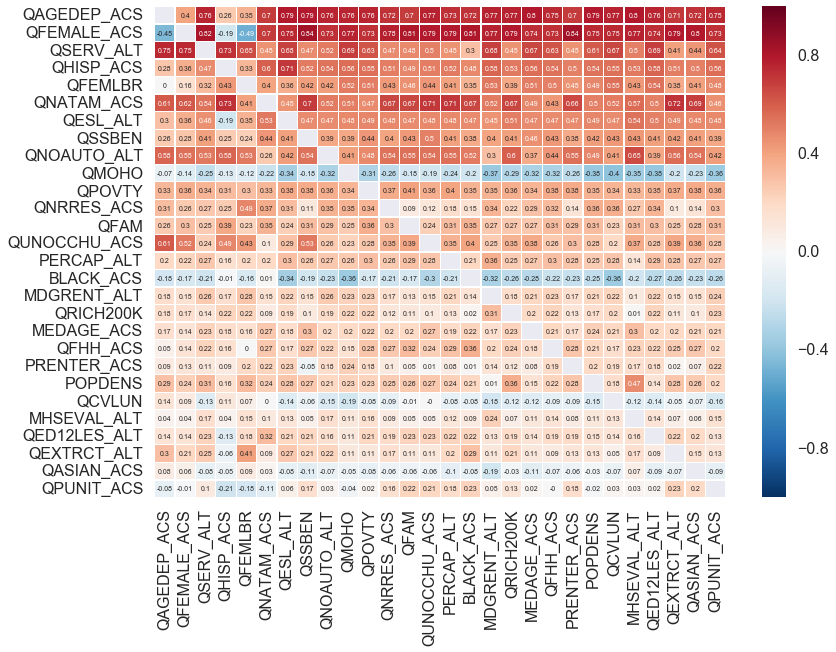

In [250]:
%matplotlib inline
sns.set_context("poster")

#Reorder and apply variable description to labels
#USvarRanks = rankContrib.USA.copy() #have to make a copy to sort index
#USvar
#dropLevels = USvarRanks.indexdesc

#plt.figure(figsize=(20, 16))
mask=np.isnan(US_Drop1_NetContrib)
sns.heatmap(US_Drop1_NetContrib, annot=True, linewidths=.25, vmin=-1, vmax=1, annot_kws={"size": 7})

### Alternative Visualizations

In [253]:
# rank all of the drop 1 net contribution values
US_Drop1_RankContrib=US_Drop1_NetContrib.apply(rankdata, axis=0, method='ordinal')
US_Drop1_RankContrib = (28-US_Drop1_RankContrib)
US_Drop1_RankContrib = US_Drop1_RankContrib.replace(0,np.nan) # remove drop variable from ranks
US_Drop1_RankContrib

,QAGEDEP_ACS,QFEMALE_ACS,QSERV_ALT,QHISP_ACS,QFEMLBR,QNATAM_ACS,QESL_ALT,QSSBEN,QNOAUTO_ALT,QMOHO,...,MEDAGE_ACS,QFHH_ACS,PRENTER_ACS,POPDENS,QCVLUN,MHSEVAL_ALT,QED12LES_ALT,QEXTRCT_ALT,QASIAN_ACS,QPUNIT_ACS
QAGEDEP_ACS,NaN,5.0,2.0,8.0,8.0,2.0,1.0,2.0,1.0,2.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0
QFEMALE_ACS,27.0,NaN,1.0,26.0,27.0,1.0,2.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
QSERV_ALT,1.0,1.0,NaN,2.0,1.0,5.0,4.0,8.0,5.0,3.0,...,3.0,3.0,8.0,3.0,3.0,7.0,3.0,8.0,7.0,3.0
QHISP_ACS,10.0,8.0,5.0,NaN,9.0,3.0,3.0,6.0,3.0,4.0,...,4.0,4.0,5.0,4.0,5.0,6.0,4.0,5.0,5.0,4.0
QFEMLBR,23.0,16.0,9.0,5.0,NaN,7.0,9.0,9.0,7.0,5.0,...,5.0,5.0,7.0,8.0,4.0,10.0,5.0,10.0,9.0,6.0
QNATAM_ACS,3.0,2.0,3.0,1.0,6.0,NaN,5.0,3.0,4.0,6.0,...,6.0,9.0,3.0,5.0,6.0,4.0,7.0,2.0,3.0,7.0
QESL_ALT,8.0,7.0,6.0,25.0,7.0,4.0,NaN,7.0,6.0,7.0,...,7.0,6.0,6.0,7.0,7.0,5.0,6.0,6.0,6.0,5.0
QSSBEN,12.0,10.0,7.0,10.0,13.0,6.0,7.0,NaN,8.0,9.0,...,8.0,8.0,10.0,9.0,8.0,9.0,8.0,7.0,8.0,9.0
QNOAUTO_ALT,4.0,3.0,4.0,3.0,2.0,14.0,6.0,4.0,NaN,8.0,...,10.0,7.0,4.0,6.0,9.0,3.0,9.0,4.0,4.0,8.0
QMOHO,24.0,26.0,27.0,24.0,24.0,27.0,27.0,26.0,27.0,NaN,...,27.0,27.0,27.0,27.0,27.0,27.0,27.0,26.0,27.0,27.0


##### Variable's Own Rank Changes

In [50]:
rankmelt=pd.melt(US_Drop1_RankContrib.transpose())

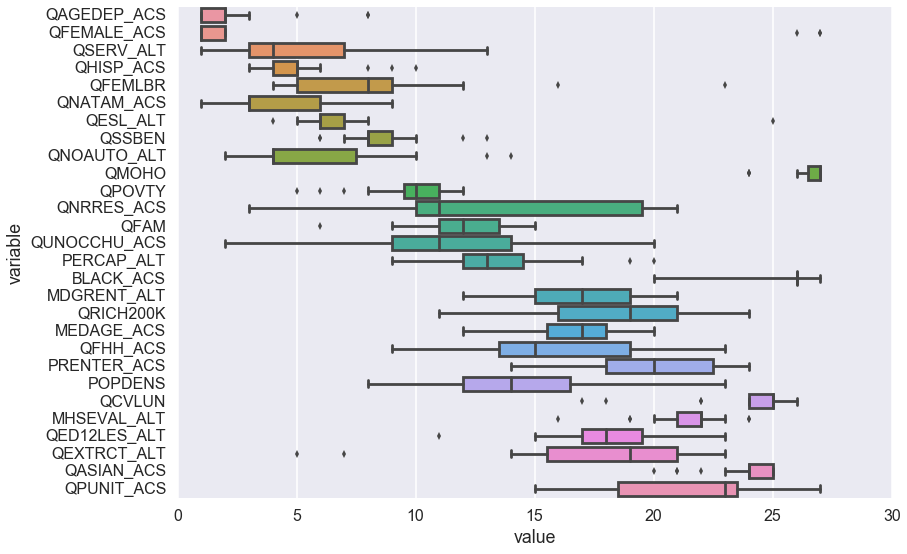

In [72]:
# boxplot of rank changes
bp=sns.boxplot(x='value',y='variable',data=rankmelt)
sns.despine(trim=True)

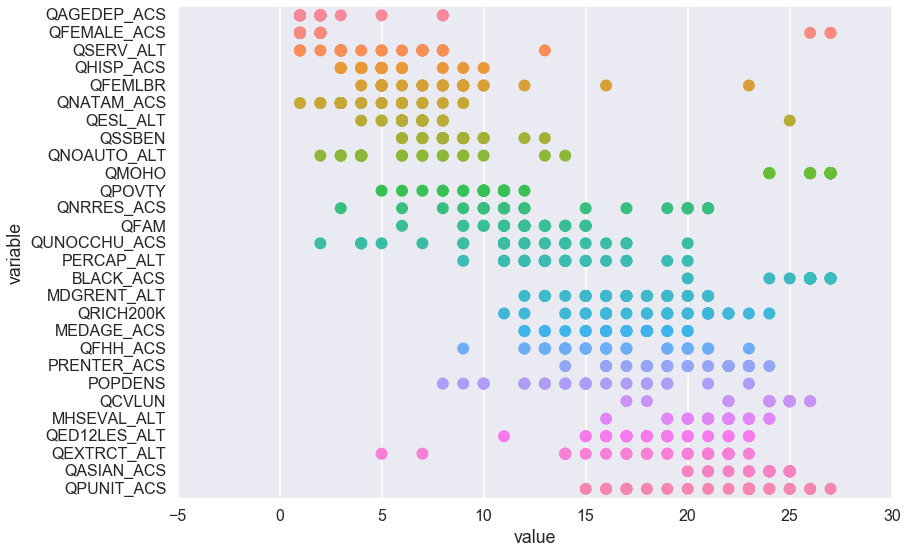

In [111]:
# strip plot of rank changes (messy)
sp=sns.stripplot(x='value',y='variable',data=rankmelt,size=12)
sp

##### Rank Changes of All Other Variables

This is sort of a "summary" of the level of movement in ranks that occurs when each variable is dropped...

In [234]:
orig_ranks=pd.Series(range(1,29),index=US_Drop1_RankContrib.index).astype(np.int64)

In [277]:
# looks scary, but for each drop variable, we're just removing the drop variable
# and computing the sum of absolute rank changes between the original and new ranks
# (movement in ranks for drop 1 run)
rank_moves=[sum(abs(orig_ranks[US_Drop1_RankContrib[i].dropna().index]-US_Drop1_RankContrib[i].dropna().astype(np.int64))) for i in US_Drop1_RankContrib.columns]
rank_moves=pd.Series(rank_moves,index=US_Drop1_RankContrib.index)
rank_moves=rank_moves.sort_values(ascending=False)
rank_moves

QAGEDEP_ACS     185
QFEMLBR         165
QHISP_ACS       164
BLACK_ACS       138
QSSBEN          130
QFEMALE_ACS     124
MHSEVAL_ALT     124
QNATAM_ACS      122
QUNOCCHU_ACS    122
QEXTRCT_ALT     118
QFAM            117
PERCAP_ALT      115
QASIAN_ACS      115
PRENTER_ACS     115
QSERV_ALT       111
QNRRES_ACS      106
QRICH200K       106
QESL_ALT         99
QNOAUTO_ALT      87
MDGRENT_ALT      83
QPOVTY           81
POPDENS          74
MEDAGE_ACS       73
QFHH_ACS         72
QCVLUN           67
QPUNIT_ACS       64
QED12LES_ALT     63
QMOHO            56
dtype: int64

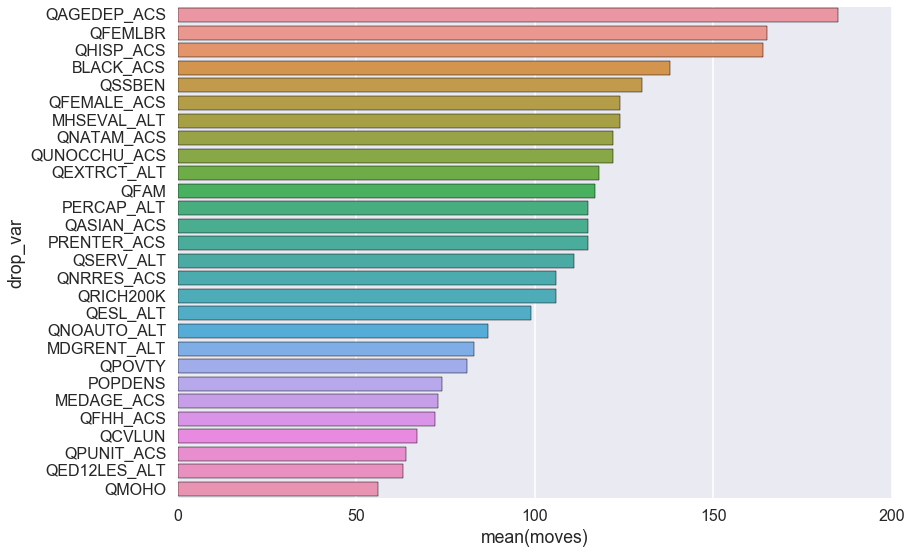

In [278]:
# lame barplot of the results
rank_moves=pd.DataFrame({'drop_var':rank_moves.index,'moves':rank_moves})
barp=sns.barplot(x='moves',y='drop_var',data=rank_moves)
sns.despine(trim=True)

#### Using Ranked Drop-One Results (IGNORE FOR NOW)

Here we quickly compare stability of SoVI scores across drop-one variables with variable net contributions. We generate the same boxplot as above but order the variables from lowest to highest in terms of the sum of their absolute value difference from the original county-level SoVI ranks. In other words, *comparing the stability of SoVI scores when a varible is dropped to stability of net contribution*.

In [196]:
# read in the ranks for original sovi run
us_sovi=pd.read_csv(os.path.join(os.getcwd(),'data','output','US_Sovi_Score.csv'))

us_sovi.index=us_sovi['Geo_FIPS'] # just in case

us_sovi['rank']=us_sovi['rank'].astype(np.int64) # convert to int64 for compatibility

In [197]:
## Compute the differences in ranks
varsdrop=US_SoVI_Drop1_Rank.index.get_level_values(0).unique() # unique drop 1 index values
rankchg_drop=np.array([sum(abs(us_sovi['rank']-US_SoVI_Drop1_Rank.ix[i,'rank'])) for i in varsdrop]) # sum abs rank change 

In [198]:
# Order the variables by greatest to lowest change in ranks
rankchg_drop_sort=pd.Series(rankchg_drop,index=varsdrop).sort_values(ascending=False).index
rankchg_drop_sort

Index(['MDGRENT_ALT', 'QPUNIT_ACS', 'QNATAM_ACS', 'POPDENS', 'QED12LES_ALT',
       'QCVLUN', 'MEDAGE_ACS', 'QFHH_ACS', 'QPOVTY', 'QESL_ALT', 'QMOHO',
       'QNOAUTO_ALT', 'QHISP_ACS', 'QRICH200K', 'PERCAP_ALT', 'QNRRES_ACS',
       'PRENTER_ACS', 'QUNOCCHU_ACS', 'QASIAN_ACS', 'QEXTRCT_ALT', 'QFAM',
       'QSSBEN', 'MHSEVAL_ALT', 'QSERV_ALT', 'BLACK_ACS', 'QFEMALE_ACS',
       'QFEMLBR', 'QAGEDEP_ACS'],
      dtype='object')

Strange relationship between a variable's net contribution and its influence (i.e. `QAGEDEP_ACS` the most influential variable overall is ranked lowest here, while `QPUNIT_ACS`, the least influential variable overall, is ranked second here.  

In [186]:
US_Drop1_RankContrib_rs=US_Drop1_RankContrib.ix[rankchg_drop_sort]

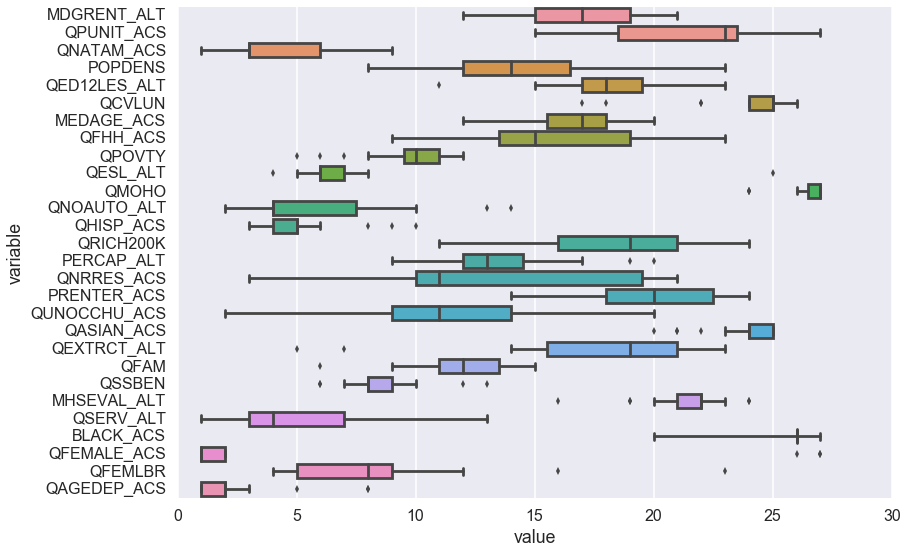

In [188]:
rankmelt_rs=pd.melt(US_Drop1_RankContrib_rs.transpose())
# boxplot of rank changes
bp=sns.boxplot(x='value',y='variable',data=rankmelt_rs)
sns.despine(trim=True)